In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
df = pd.read_csv(r"D:\coding\Deep Learning and Neural Networks\Deep Learning udemy\fake_reg.csv")

In [3]:
df.tail()

,price,feature1,feature2
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851
999,599.367093,999.232244,1001.451407


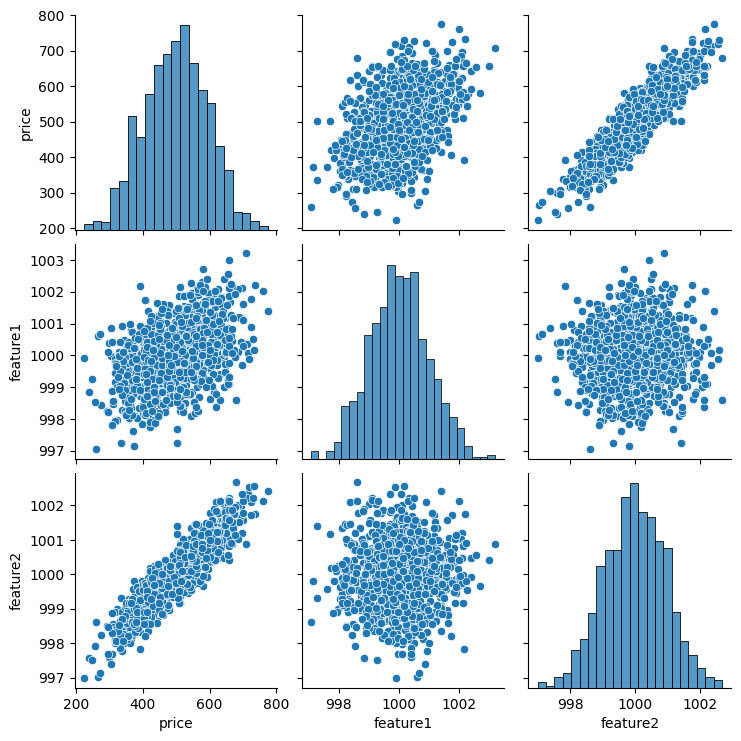

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values
y = df[['price']].values

In [7]:
# X

In [8]:
# y

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [10]:
# X_train.shape, X_test.shape

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaler.fit(X_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [13]:
X_train = scaler.transform(X_train)

In [14]:
# X_train

In [15]:
X_test = scaler.transform(X_test)

In [16]:
# X_test

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
# help(Sequential)

In [19]:
# help(Dense)

In [20]:
model = Sequential()

model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))
model.add(Dense(4,activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [21]:
model.fit(x = X_train, y = y_train, epochs = 250)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 253789.1094
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 258948.7812
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254104.0312
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255257.7656
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257563.9688
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 253693.3594
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 256934.1250
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 250482.1250
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 250303.1250
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 261015.9375
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 250098.1562
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 249245.4062
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 248278.9219
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 252144.8125
E

In [22]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

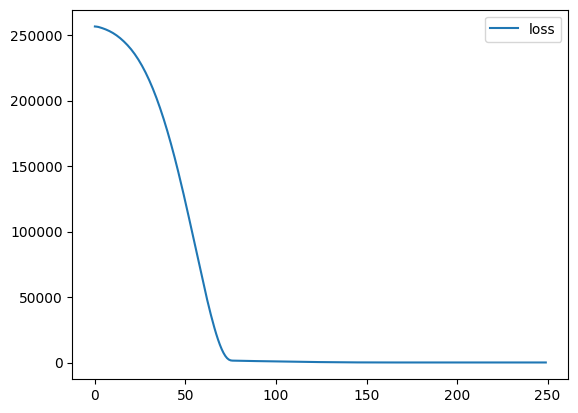

In [23]:
loss_df.plot()

In [24]:
model.evaluate(X_test, y_test,verbose = 0)

25.170360565185547

In [25]:
model.evaluate(X_train,y_train, verbose = 0)

23.72840690612793

In [26]:
test_predictions = model.predict(X_test,verbose = 0)

In [27]:
# test_predictions

In [28]:
# y_test

In [29]:
y_test = pd.DataFrame(y_test)

In [30]:
test_predictions = pd.DataFrame(test_predictions)

In [31]:
diff_df = pd.concat([y_test, test_predictions],axis = 1)

In [32]:
# diff_df

In [33]:
diff_df.columns = ['Actual Value','Predicted Value']

In [34]:
# diff_df

In [35]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [36]:
diff_df.describe()

,Actual Value,Predicted Value
count,300.000000,300.000000
mean,500.375339,500.799072
std,93.922502,94.097603
min,246.739720,250.865158
25%,435.220788,436.581451
50%,502.979961,503.974213
75%,567.451939,567.952377
max,722.263944,721.528198


<Axes: xlabel='Predicted Value', ylabel='Actual Value'>

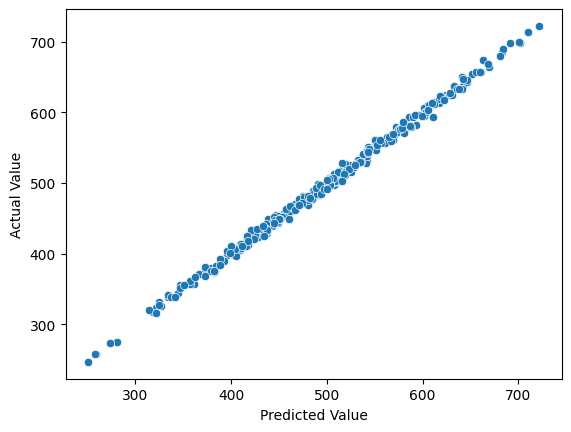

In [37]:
sns.scatterplot(x = 'Predicted Value', y = 'Actual Value', data = diff_df)

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
mean_absolute_error(diff_df['Actual Value'], diff_df['Predicted Value'])

4.025777276675424

In [40]:
mean_squared_error(diff_df['Actual Value'], diff_df['Predicted Value'])

25.170366106189427

In [41]:
mean_squared_error(diff_df['Actual Value'], diff_df['Predicted Value'])**0.5

5.017007684485786

In [50]:
from tensorflow.keras.models import load_model
model.save('my_gem_model.h5')

In [51]:
new_gem = [[1000.771023,998.562851]]

In [52]:
new_gem = scaler.transform(new_gem)

In [53]:
model.predict(new_gem,verbose = 0)

array([[403.49478]], dtype=float32)

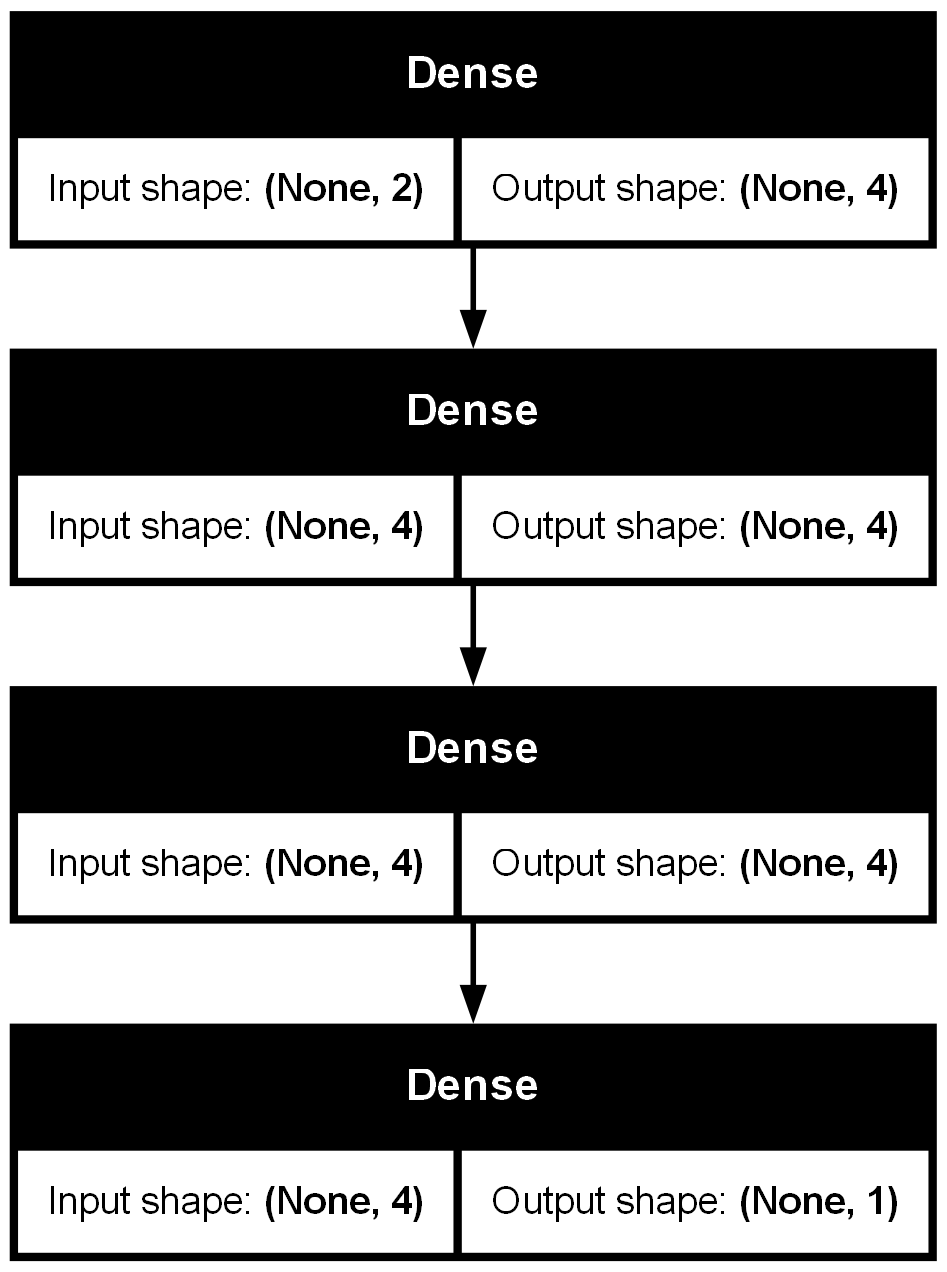

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model_structure.png')